# 1. Import libraries untuk analisis

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# 2. Analisis Data Eksplorasi dan Feature Engineering

In [2]:
data_train = pd.read_csv('../input/bike-share-demand/train.csv')
data_test = pd.read_csv('../input/bike-share-demand/test.csv')

In [3]:
data_train.sample(5)

,datetime,season,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
412,2011-01-19 05:00:00,1,0,3,1,2,0.22,0.2576,0.93,0.0896,0,7,7
1866,2011-05-04 16:00:00,2,0,3,1,1,0.50,0.4848,0.45,0.4627,22,173,195
7572,2012-05-14 21:00:00,2,0,1,1,2,0.58,0.5455,0.83,0.0896,7,145,152
7008,2012-04-10 08:00:00,2,0,2,1,1,0.38,0.3939,0.62,0.1343,22,670,692
4671,2011-11-07 17:00:00,4,0,1,1,1,0.50,0.4848,0.45,0.1642,39,489,528


## Plot Distribusi dari Variabel Kontinu

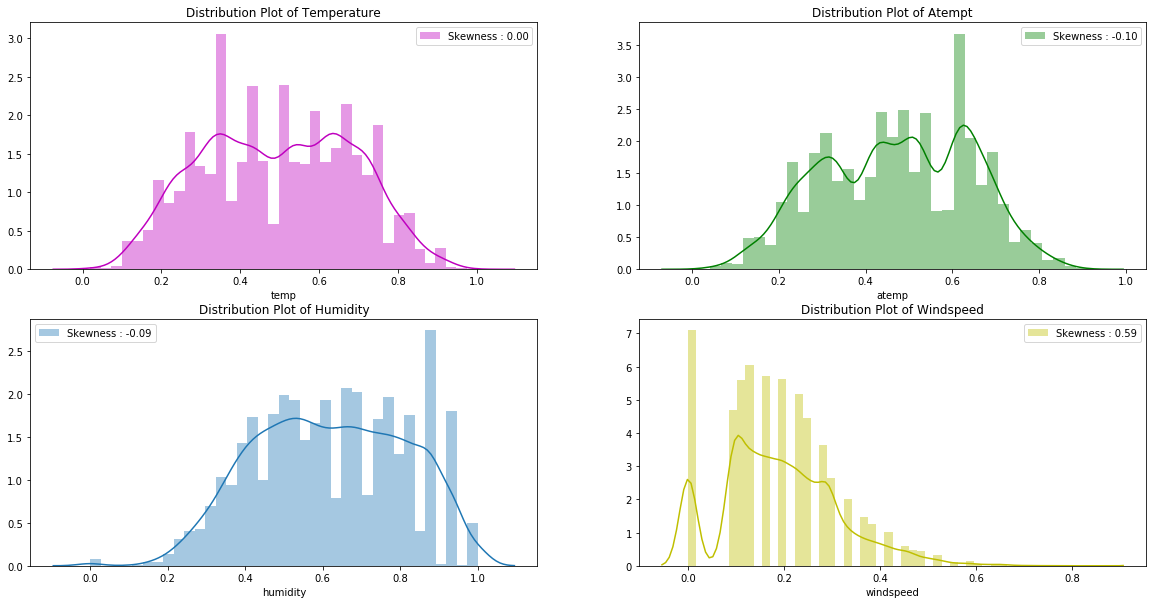

In [4]:
x_train = data_train.iloc[:, :-3]
y_train = data_train.iloc[:, -1]

fig, ax = plt.subplots(2, 2, squeeze = False, figsize = (20, 10))
#plt.figure(figsize = [10, 5])
ax1 = sns.distplot(x_train.temp, ax = ax[0,0], color = 'm', label = "Skewness : %.2f"%x_train.temp.skew())
ax1.set_title('Distribution Plot of Temperature')
ax1 = ax1.legend(loc = "best")
#ax1.text(.6, 3.1, s = [skew, str(1)])
# ('skew', str(x_train.temp.skew()))
ax2 = sns.distplot(x_train.atemp, color = 'g', ax = ax[0,1], label = "Skewness : %.2f"%x_train.atemp.skew())
ax2.set_title('Distribution Plot of Atempt')
ax2 = ax2.legend(loc = "best")

ax3 = sns.distplot(x_train.humidity, ax = ax[1,0], label = "Skewness : %.2f"%x_train.humidity.skew())
ax3.set_title('Distribution Plot of Humidity')
ax3 = ax3.legend(loc = "best")

ax4 = sns.distplot(x_train.windspeed, ax = ax[1,1], color = 'y', label = "Skewness : %.2f"%x_train.windspeed.skew())
ax4.set_title('Distribution Plot of Windspeed')
ax4 = ax4.legend(loc = "best")


## Plot Distribusi dari Variabel Diskrit

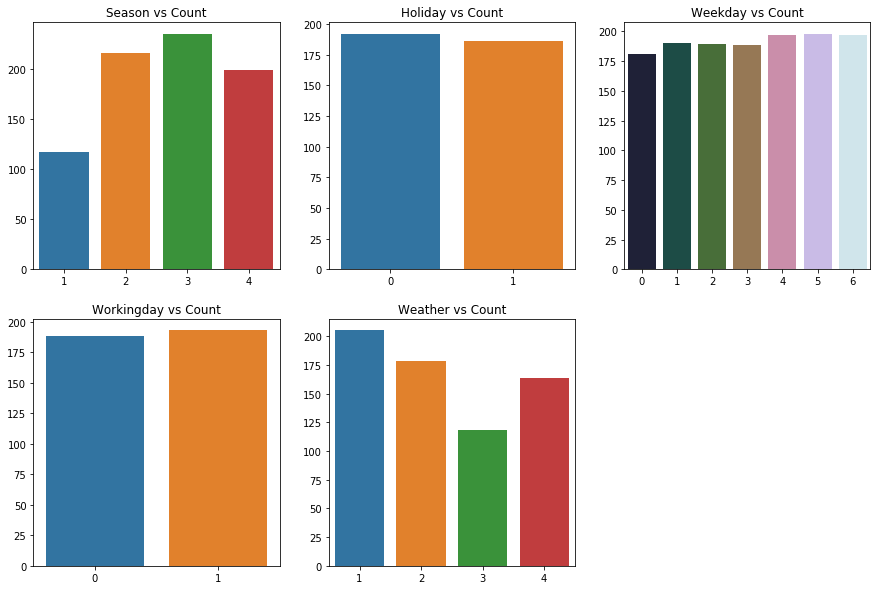

In [5]:
fig, ax = plt.subplots(2, 3, squeeze = False, figsize = (15, 10))
name_season = ['1', '2', '3', '4']
value_season = [data_train[data_train.season == 1].iloc[:, -1].sum()/len(data_train[data_train.season == 1]), 
         data_train[data_train.season == 2].iloc[:, -1].sum()/len(data_train[data_train.season == 2]), 
         data_train[data_train.season == 3].iloc[:, -1].sum()/len(data_train[data_train.season == 3]),
         data_train[data_train.season == 4].iloc[:, -1].sum()/len(data_train[data_train.season == 4])]
ax1 = sns.barplot(name_season, value_season, ax = ax[0,0])
ax1.set_title('Season vs Count')

name_holiday = ['0', '1']
value_holiday = [data_train[data_train.holiday == 0].iloc[:, -1].sum()/len(data_train[data_train.holiday == 0]), 
                 data_train[data_train.holiday == 1].iloc[:, -1].sum()/len(data_train[data_train.holiday == 1])]

ax2 = sns.barplot(name_holiday, value_holiday, ax = ax[0,1])
ax2.set_title('Holiday vs Count')

name_weekday = ['0', '1', '2', '3', '4', '5', '6']
value_weekday = [data_train[data_train.weekday == 0].iloc[:, -1].sum()/len(data_train[data_train.weekday == 0]),
                data_train[data_train.weekday == 1].iloc[:, -1].sum()/len(data_train[data_train.weekday == 1]), 
                data_train[data_train.weekday == 2].iloc[:, -1].sum()/len(data_train[data_train.weekday == 2]), 
                data_train[data_train.weekday == 3].iloc[:, -1].sum()/len(data_train[data_train.weekday == 3]), 
                data_train[data_train.weekday == 4].iloc[:, -1].sum()/len(data_train[data_train.weekday == 4]), 
                data_train[data_train.weekday == 5].iloc[:, -1].sum()/len(data_train[data_train.weekday == 5]), 
                data_train[data_train.weekday == 6].iloc[:, -1].sum()/len(data_train[data_train.weekday == 6])]

ax3 = sns.barplot(name_weekday, value_weekday, ax = ax[0,2], palette = 'cubehelix')
ax3.set_title('Weekday vs Count')

name_workingday = name_holiday.copy()
value_workingday = [data_train[data_train.workingday == 0].iloc[:, -1].sum()/len(data_train[data_train.workingday == 0]), 
                 data_train[data_train.workingday == 1].iloc[:, -1].sum()/len(data_train[data_train.workingday == 1])]

ax4 = sns.barplot(name_workingday, value_workingday, ax = ax[1,0])
ax4.set_title('Workingday vs Count')

name_weather = name_season.copy()
value_weather = [data_train[data_train.weather == 1].iloc[:, -1].sum()/len(data_train[data_train.weather == 1]), 
         data_train[data_train.weather == 2].iloc[:, -1].sum()/len(data_train[data_train.weather == 2]), 
         data_train[data_train.weather == 3].iloc[:, -1].sum()/len(data_train[data_train.weather == 3]),
         data_train[data_train.weather == 4].iloc[:, -1].sum()/len(data_train[data_train.weather == 4])]

ax5 = sns.barplot(name_weather, value_weather, ax = ax[1,1])
ax5.set_title('Weather vs Count')

fig.delaxes(ax[1][2])

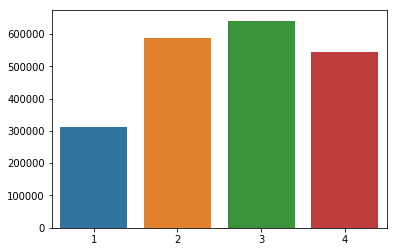

In [6]:
name = ['1', '2', '3', '4']
value = [data_train[data_train.season == 1].iloc[:, -1].sum(), 
         data_train[data_train.season == 2].iloc[:, -1].sum(), 
         data_train[data_train.season == 3].iloc[:, -1].sum(),
         data_train[data_train.season == 4].iloc[:, -1].sum()]

sns.barplot(name, value)

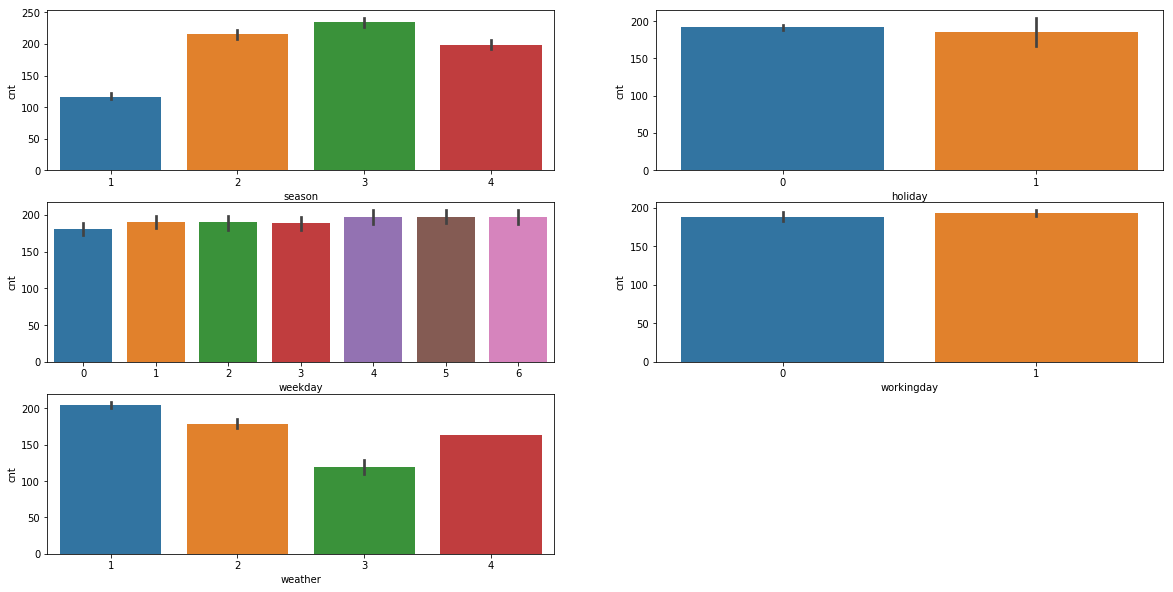

In [7]:
fig, ax = plt.subplots(3, 2, figsize = (20, 10))
#ax5_hist = sns.factorplot(x = 'season', data = x_train, ax = ax[0,0], kind = 'count', palette = 'cubehelix')
ax5 = sns.factorplot(x = 'season', y = 'cnt', data = data_train, kind = 'bar', ax = ax[0,0])
#ax5.set_title('Number of Count Based On Season')
plt.close()

ax6 = sns.factorplot(x = 'holiday', y = 'cnt', data = data_train, kind = 'bar', ax = ax[0,1])
plt.close()

ax7 = sns.factorplot(x = 'weekday', y = 'cnt', data = data_train, kind = 'bar', ax = ax[1,0])
plt.close()

ax8 = sns.factorplot(x = 'workingday', y = 'cnt', data = data_train, kind = 'bar', ax = ax[1,1])
plt.close()

ax9 = sns.factorplot(x = 'weather', y = 'cnt', data = data_train, kind = 'bar', ax = ax[2,0], size = 5, aspect = 1)
plt.close()

fig.delaxes(ax[2][1])

In [8]:
data_train.describe()

,season,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,2.998622,0.680875,1.418427,0.493436,0.473102,0.618865,0.191036,36.021955,155.552177,191.574132
std,1.116174,0.166599,2.007770,0.466159,0.633839,0.190039,0.169492,0.192450,0.121859,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.770000,0.253700,49.000000,222.000000,284.000000
max,4.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.909100,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
data_train.shape

(10886, 13)

In [10]:
data_test.head()

,datetime,season,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,4,1,1,0.26,0.2273,0.56,0.3881
1,2011-01-20 01:00:00,1,0,4,1,1,0.26,0.2727,0.56,0.0000
2,2011-01-20 02:00:00,1,0,4,1,1,0.26,0.2727,0.56,0.0000
3,2011-01-20 03:00:00,1,0,4,1,1,0.26,0.2576,0.56,0.1642
4,2011-01-20 04:00:00,1,0,4,1,1,0.26,0.2576,0.56,0.1642


Mengambil informasi dari variabel datetime

In [11]:
for j in [data_train,data_test]:
    j["hour"] = [i.hour for i in pd.DatetimeIndex(j.datetime)]
    j["day"] = [i.dayofweek for i in pd.DatetimeIndex(j.datetime)]
    j["month"] = [i.month for i in pd.DatetimeIndex(j.datetime)]
    j['year'] = [i.year for i in pd.DatetimeIndex(j.datetime)]
    j['year'] = j['year'].map({2011:1, 2012:0})

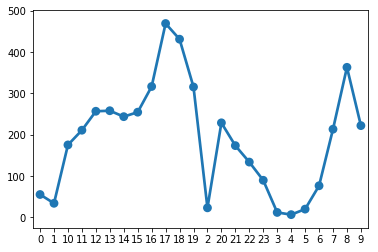

In [12]:
hourcount = []
for i in range(0, 24) :
    hourcount.append(data_train[data_train.hour == i].cnt.sum()/len(data_train[data_train.hour == i]))
hour = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
sns.pointplot(x = hour, y = hourcount)

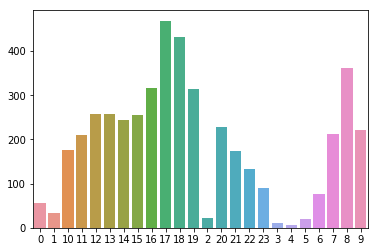

In [13]:
sns.barplot(x = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'], y = hourcount)

- Membuang variabel 'casual' dan 'registered' karena variabel ini tidak ada pada test data
- Membuang variabel 'datetime' yang telah diekstrak

In [14]:
data_train = data_train.drop(['casual','registered'], axis=1)
datetime_train = data_train.pop("datetime")
datetime_test = data_test.pop("datetime")

In [15]:
#Tambahan untuk EDA: Pandas Profiling
import pandas_profiling as pp
pp.ProfileReport(data_train)

- variabel 'temp' dan 'month' dibuang berdasarkan hasil analisis eksplorasi data diatas (korelasi yang terlalu tinggi dengan variabel lain)
- membuang 1 row yang sama persis

In [16]:
data_train = data_train.drop_duplicates(keep='first')
data_train = data_train.drop(['month','temp'],axis=1)
data_test = data_test.drop(['month','temp'],axis=1)

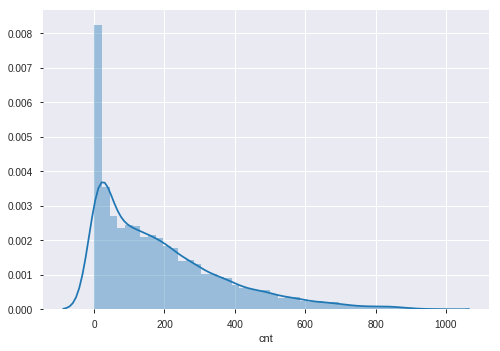

In [17]:
sns.distplot(data_train.cnt)

Transformasi log dari variabel 'count' (yang ingin diprediksi) karena distribusi variabel yang skew ke kanan

In [18]:
label = np.log(data_train.pop('cnt'))

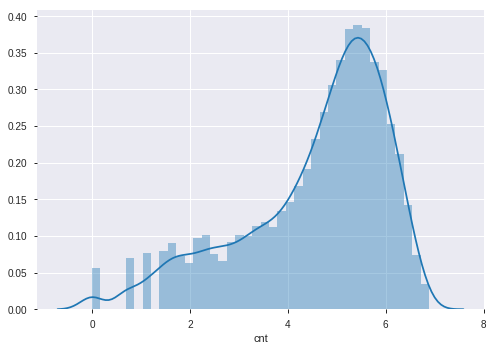

In [19]:
sns.distplot(label)

Mengecek data hilang dari masing-masing variabel

In [20]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [21]:
print(missing_values_table(data_train), "\n")
print(missing_values_table(data_test), "\n")

Your selected dataframe has 11 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: [] 

Your selected dataframe has 11 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: [] 



Merubah tipe data dari variabel 'weather', 'season', 'year' menjadi kategorik

In [22]:
string_columns = ['weather','season','year']
data_train[string_columns] = data_train[string_columns].astype(str)
data_test[string_columns] = data_test[string_columns].astype(str)

Membuat variabel dummy dari variabel kategorik

In [23]:
ds = pd.get_dummies(data_train)
ds.head()

,holiday,weekday,workingday,atemp,humidity,windspeed,hour,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_0,year_1
0,0,6,0,0.2879,0.81,0.0,0,5,1,0,0,0,1,0,0,0,0,1
1,0,6,0,0.2727,0.80,0.0,1,5,1,0,0,0,1,0,0,0,0,1
2,0,6,0,0.2727,0.80,0.0,2,5,1,0,0,0,1,0,0,0,0,1
3,0,6,0,0.2879,0.75,0.0,3,5,1,0,0,0,1,0,0,0,0,1
4,0,6,0,0.2879,0.75,0.0,4,5,1,0,0,0,1,0,0,0,0,1


In [24]:
data_test_dummy = pd.get_dummies(data_test)
data_test_dummy.head()

,holiday,weekday,workingday,atemp,humidity,windspeed,hour,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_0,year_1
0,0,4,1,0.2273,0.56,0.3881,0,3,1,0,0,0,1,0,0,0,0,1
1,0,4,1,0.2727,0.56,0.0000,1,3,1,0,0,0,1,0,0,0,0,1
2,0,4,1,0.2727,0.56,0.0000,2,3,1,0,0,0,1,0,0,0,0,1
3,0,4,1,0.2576,0.56,0.1642,3,3,1,0,0,0,1,0,0,0,0,1
4,0,4,1,0.2576,0.56,0.1642,4,3,1,0,0,0,1,0,0,0,0,1


In [25]:
ds.reset_index(inplace=True,drop=True)
data_test_dummy.reset_index(inplace=True,drop=True)

# 3. Modelling

In [26]:
from prettytable import PrettyTable

In [27]:
#Libraries
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.base import BaseEstimator, ClassifierMixin

#Preprocessing libraries
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Modelling libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xg
import lightgbm as lgb
import catboost as cb
from IPython.display import clear_output

from sklearn.model_selection import GridSearchCV

Split data untuk mengukur tingkat akurasi dari model

In [28]:
n_folds = 7

X = np.array(ds)
y = np.array(label)

X, X_test, y, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

Membuat metode scorer dari model

In [29]:
def rmsle_bike(y, y_pred):
    y = np.exp(y)
    y_pred = np.exp(y_pred)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_pred]))
    temp = (log1 - log2) ** 2
    return np.sqrt(np.mean(temp))

Melakukan eksplorasi terhadap performa model terhadap data

In [30]:
def train_predict(learner,sample_size,X_train,y_train,X_test,y_test):
    results={}
    #Transform to numpy
    X_train,X_test= np.array(X_train),np.array(X_test)
    #Fit the learner to the training data using slicing with 'sample_size' using .fit
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    
    #Get the predictions on the test set(X_test),
    #then get predictions on the training samples(X_train) using .predict
    predictions_train = learner.predict(X_train[:sample_size])
    predictions_test = learner.predict(X_test)
    
    #Compute accuracy on the training samples which is y_train
    #results['acc_train'] = np.sqrt(mean_squared_log_error(y_train[:sample_size],predictions_train))
    results['acc_train'] = rmsle_bike(y_train[:sample_size],predictions_train)
    
    #Compute accuracy on test set using accuracy_score()
    #results['acc_test'] = np.sqrt(mean_squared_log_error(y_test,predictions_test))
    results['acc_test'] = rmsle_bike(y_test[:sample_size],predictions_test)
    
    #Success
    print("{} trained on {} samples.".format(learner.__class__.__name__,sample_size))
    
    
    #Return the results
    return results

In [31]:
#Initialize the regressor model
clf_A = cb.CatBoostRegressor(verbose=False)
clf_B = SVR()
clf_C = RandomForestRegressor(random_state=0)
clf_D = LinearRegression()
clf_E = ExtraTreesRegressor(max_depth=13)
clf_F = DecisionTreeRegressor(max_depth=14)
clf_G = GradientBoostingRegressor(random_state=0)
clf_H = lgb.LGBMRegressor(silent=True)
clf_I = xg.XGBRegressor()
clf_var = ["clf_A","clf_B","clf_C","clf_D","clf_G","clf_H","clf_I","clf_F","clf_E"]
clf_list = [clf_A,clf_B,clf_C,clf_D,clf_G,clf_H,clf_I,clf_F,clf_E]

#Calculate the number of samples for 100% of the training data
samples_100 = int(len(X)/1)

In [32]:
results = {}
for clf in clf_list:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i,samples in enumerate([samples_100]):
        results[clf_name][i] = train_predict(clf,samples,X,y,X_test,y_test)

CatBoostRegressor trained on 7619 samples.
SVR trained on 7619 samples.
RandomForestRegressor trained on 7619 samples.
LinearRegression trained on 7619 samples.
GradientBoostingRegressor trained on 7619 samples.
LGBMRegressor trained on 7619 samples.
[16:40:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor trained on 7619 samples.
DecisionTreeRegressor trained on 7619 samples.
ExtraTreesRegressor trained on 7619 samples.


In [33]:
tb = PrettyTable(["Category name","Train Accuracy","Test Accuracy","Train Test Difference"])
for clf in clf_list:
    clf_name = clf.__class__.__name__
    a_train = round(results[clf_name][0]["acc_train"],5)
    a_test  = round(results[clf_name][0]["acc_test"],5)
    a_diff  = round(abs(results[clf_name][0]["acc_train"]-results[clf_name][0]["acc_test"]),5)
    tb.add_row([clf_name,a_train,a_test,a_diff])
print(tb)

+---------------------------+----------------+---------------+-----------------------+
|       Category name       | Train Accuracy | Test Accuracy | Train Test Difference |
+---------------------------+----------------+---------------+-----------------------+
|     CatBoostRegressor     |    0.27468     |     0.2915    |        0.01682        |
|            SVR            |    0.31905     |    0.32877    |        0.00972        |
|   RandomForestRegressor   |    0.14476     |    0.32489    |        0.18013        |
|      LinearRegression     |    1.02098     |    0.98459    |        0.03638        |
| GradientBoostingRegressor |    0.37759     |    0.39238    |        0.01479        |
|       LGBMRegressor       |    0.24598     |    0.29706    |        0.05109        |
|        XGBRegressor       |     0.3736     |    0.38722    |        0.01362        |
|   DecisionTreeRegressor   |    0.13935     |    0.44891    |        0.30956        |
|    ExtraTreesRegressor    |    0.13258   

Ternyata model terbaik terdapat pada model CatBoostRegressor, namun perlu dilakukan pengecekan dengan metode Cross-Validation untuk memastikan model bekerja dengan baik

In [34]:
kf = KFold(n_folds, shuffle=True)
def rmse_cv(model, X = X, y = y, kf = kf):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def clf_model(clf,features,target,X_train,X_test,y_train,y_test,nfol=5):
    clf_fit_train  = clf.fit(X_train,y_train)
    clf_fit_test   = clf.fit(X_test,y_test)
    
    clf_pred_train = clf.predict(X_train)
    clf_pred_test  = clf.predict(X_test)
    
    clf_acc_train  = rmsle_bike(y_train,clf_pred_train)
    clf_acc_test  = rmsle_bike(y_test,clf_pred_test)
    
    print("RMSLE Score on Train Data is {0:.3%}".format(clf_acc_train))
    print("RMSLE Score on Test Data is {0:.3%}".format(clf_acc_test))
    
    #K-Folds
    kf = KFold(n_splits=nfol, shuffle = True)
    
    error = []
    for train, test in kf:
        train_X = features[train,:]
        train_y = target[train]
        clf.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=features[test,:]
        test_y=target[test]
        error.append(clf.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    return np.mean(error)

In [35]:
tbcv = PrettyTable(["Category name","CV Score"])
removal_model=[]
X1 = np.concatenate((X,X_test))
y1 = np.concatenate((y,y_test))
for clf,regressor in enumerate(clf_list):
    print("Here is regressor of:",regressor)
    clf_name = regressor.__class__.__name__
    if clf_name not in removal_model:
        clf_hit = rmse_cv(clf_list[clf],X1,y1)
        tbcv.add_row([clf_name,np.mean(clf_hit)])
    else:
        clear_output()
        continue
    clear_output()
print(tbcv)

+---------------------------+---------------------+
|       Category name       |       CV Score      |
+---------------------------+---------------------+
|     CatBoostRegressor     | 0.32324987560230795 |
|            SVR            |  0.3602843129831038 |
|   RandomForestRegressor   |  0.3573338757016824 |
|      LinearRegression     |  1.0649398053180026 |
| GradientBoostingRegressor |  0.4127471903900763 |
|       LGBMRegressor       | 0.32440023366992865 |
|        XGBRegressor       |  0.4123396470837935 |
|   DecisionTreeRegressor   |  0.4537227733165953 |
|    ExtraTreesRegressor    | 0.35528796161423465 |
+---------------------------+---------------------+


Ternyata hasil yang diperoleh menyatakan CatBoostRegressor model terbaik, hal ini selaras dengan hasil tabel yang sebelumnya, sehingga model yang dipilih dalam prediksi adalah model CatBoostRegressor

# 4. Predict Data Test

In [36]:
clf_A.fit(np.array(ds),np.array(label))
y_pred=clf_A.predict(np.array(data_test_dummy))
y_pred = np.exp(y_pred)
submission = pd.DataFrame({"datetime": datetime_test,"count":y_pred})
submission['count'] = round(submission['count']).astype('int')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,10
1,2011-01-20 01:00:00,5
2,2011-01-20 02:00:00,3
3,2011-01-20 03:00:00,2
4,2011-01-20 04:00:00,2


In [37]:
submission.tail()

,datetime,count
6488,2012-12-31 19:00:00,215
6489,2012-12-31 20:00:00,148
6490,2012-12-31 21:00:00,110
6491,2012-12-31 22:00:00,77
6492,2012-12-31 23:00:00,44


In [38]:
submission.to_csv('Submission_Catboost.csv', index=False)